## 1. Loading Data

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(18,8)

In [22]:
# pclass: A proxy for socio-economic status (SES)
# 1st = Upper
# 2nd = Middle
# 3rd = Lower

# age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# sibsp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

# parch: The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them.


# survival	Survival	0 = No, 1 = Yes
# pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
# sex	Sex	
# Age	Age in years	
# sibsp	# of siblings / spouses aboard the Titanic	
# parch	# of parents / children aboard the Titanic	
# ticket	Ticket number	
# fare	Passenger fare	
# cabin	Cabin number	
# embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [23]:
from google.colab import drive
drive.mount('/content/drive')

drive='/content/drive/MyDrive/주피터_대피소/kaggle&github/1.titanic/'
df_train=pd.read_csv(drive+ 'train.csv')
df_test=pd.read_csv(drive+ 'test.csv')
df_gender=pd.read_csv(drive+ 'gender_submission.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# train.info()

In [26]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 1-1. null data checking

In [28]:
for col in df_train.columns :
  msg = 'column : {:>10}/t percent of NaN value:{:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
  print(msg)

column : PassengerId/t percent of NaN value:0.00%
column :   Survived/t percent of NaN value:0.00%
column :     Pclass/t percent of NaN value:0.00%
column :       Name/t percent of NaN value:0.00%
column :        Sex/t percent of NaN value:0.00%
column :        Age/t percent of NaN value:19.87%
column :      SibSp/t percent of NaN value:0.00%
column :      Parch/t percent of NaN value:0.00%
column :     Ticket/t percent of NaN value:0.00%
column :       Fare/t percent of NaN value:0.00%
column :      Cabin/t percent of NaN value:77.10%
column :   Embarked/t percent of NaN value:0.22%


In [29]:
for col in df_test.columns :
  msg = 'column : {:>10}/t percent of NaN value:{:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
  print(msg)

column : PassengerId/t percent of NaN value:0.00%
column :     Pclass/t percent of NaN value:0.00%
column :       Name/t percent of NaN value:0.00%
column :        Sex/t percent of NaN value:0.00%
column :        Age/t percent of NaN value:20.57%
column :      SibSp/t percent of NaN value:0.00%
column :      Parch/t percent of NaN value:0.00%
column :     Ticket/t percent of NaN value:0.00%
column :       Fare/t percent of NaN value:0.24%
column :      Cabin/t percent of NaN value:78.23%
column :   Embarked/t percent of NaN value:0.00%


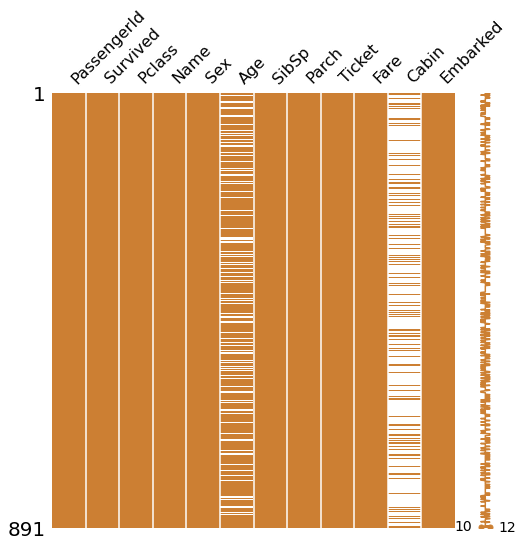

In [30]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

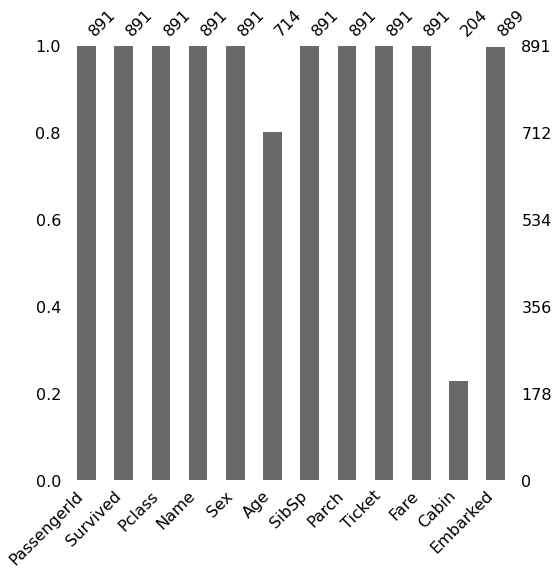

In [31]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8))

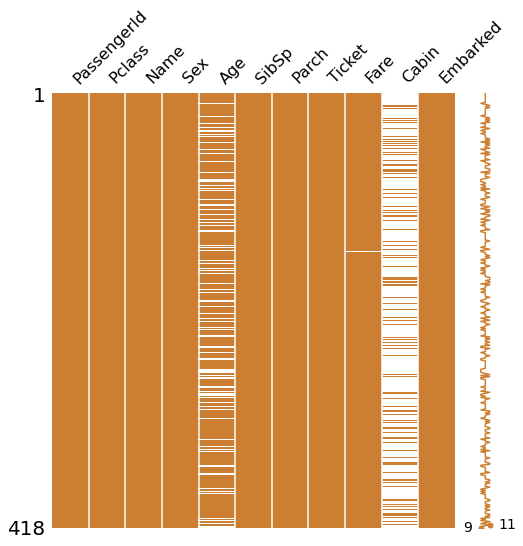

In [32]:
msno.matrix(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

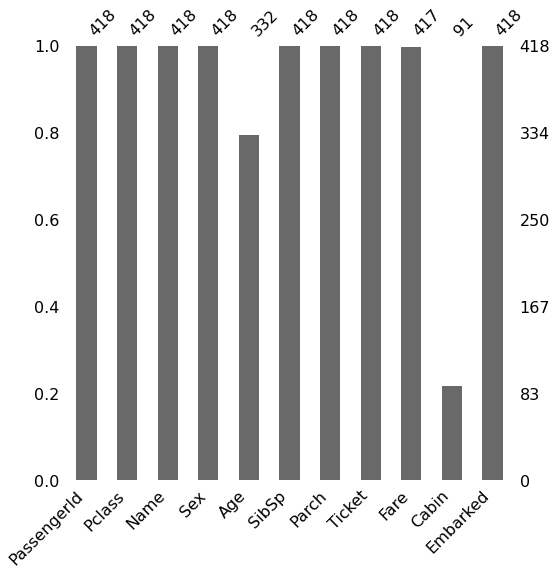

In [33]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8))

##1-2. Target label cheking

In [34]:
## target label의 distribution 확인


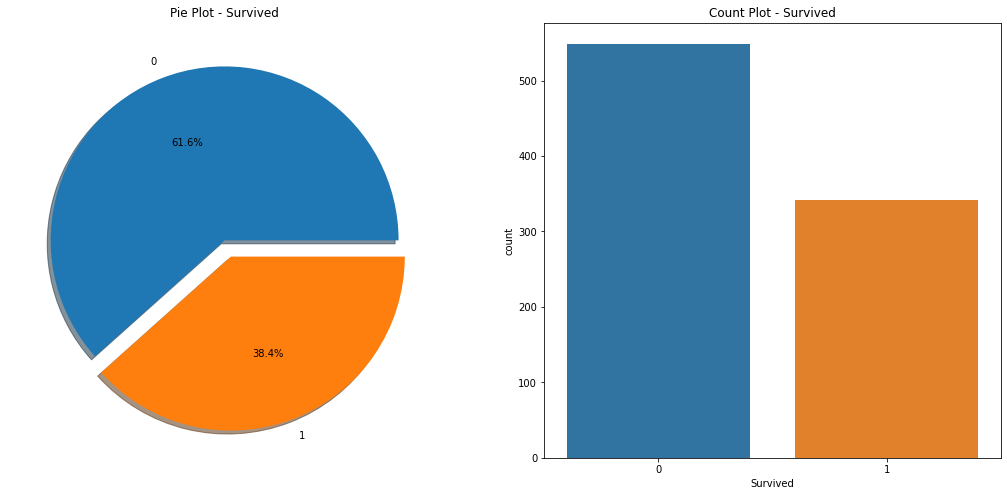

In [35]:
#subplots_'s'넣어야함
f, ax = plt.subplots (1,2, figsize =(18,8))

#pieplot
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')
#barplot

#sns.factorplot(x='Survived', data=df_train, kind='count', ax=ax[1], size=5, aspect=1)
#ax[1].set_title('Count Plot - Survived')
#왜 이렇게하면 나누어져서 나오는건가

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count Plot - Survived')


plt.show()


In [36]:
# 38.4% survived
# target label was quitely balanced.


## 2.EDA

##2-1.Pclass

In [37]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [38]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [39]:
##if using crosstab in pd, this process more comfortable

pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [40]:
# 다음과 같은 방법으로 여러개의 명령어를 통해 한줄로 barplot 표현 또한 가능

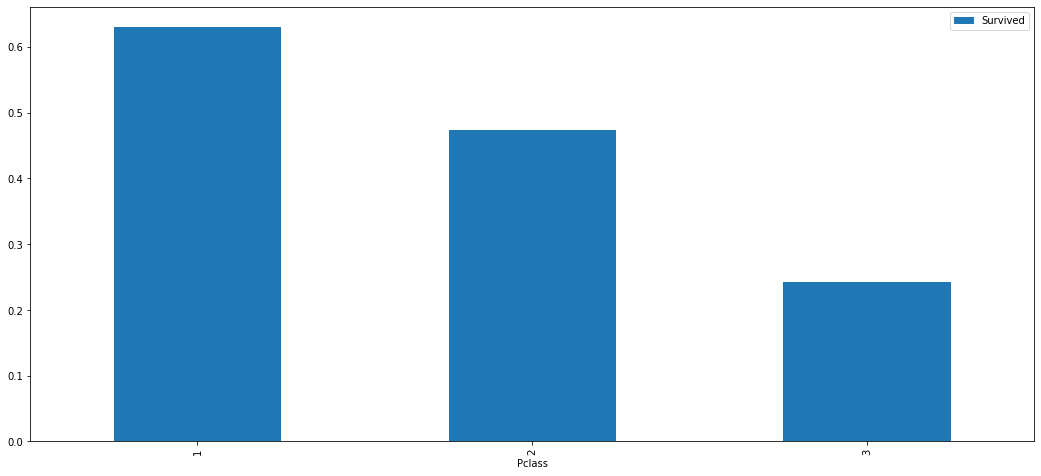

In [41]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

In [42]:
# higher class, higher survive ratio

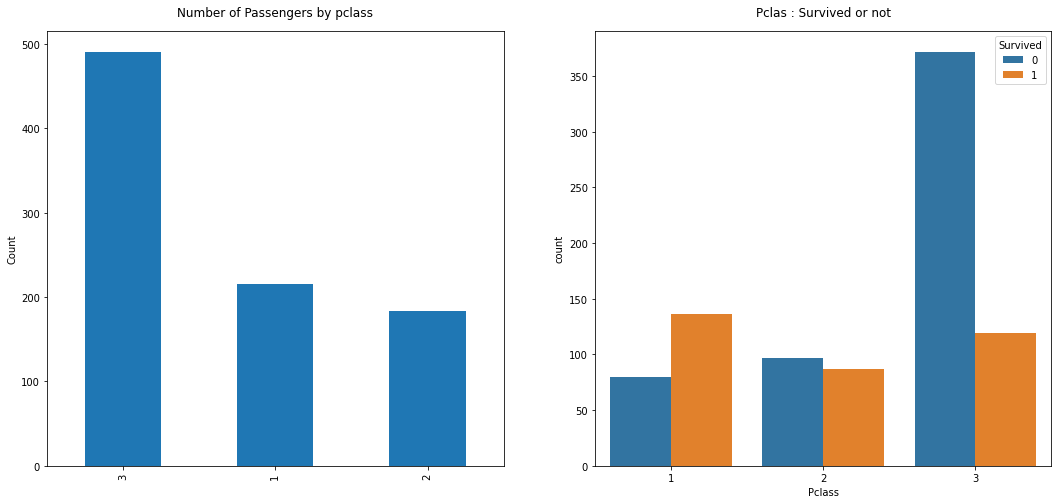

In [43]:
#what is this
y_position=1.02

f, ax=plt.subplots(1,2 , figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers by pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclas : Survived or not', y=y_position)
plt.show()

In [44]:
# 3rd class is higher dying ratio
# 1st and 2nd has similary #passengers.however, there are diff btw survived passengers.
#it means that 1st class is safer than other class
#--> class is affected to survive

## 2-2. Sex

In [45]:
# train['Sex'].isnull().sum()
# test['Sex'].isnull().sum()

In [46]:
# train['Sex_Clean']=train['Sex'].astype('category').cat.codes
# test['Sex_Clean']=test['Sex'].astype('category').cat.codes

# train['Sex_Clean']

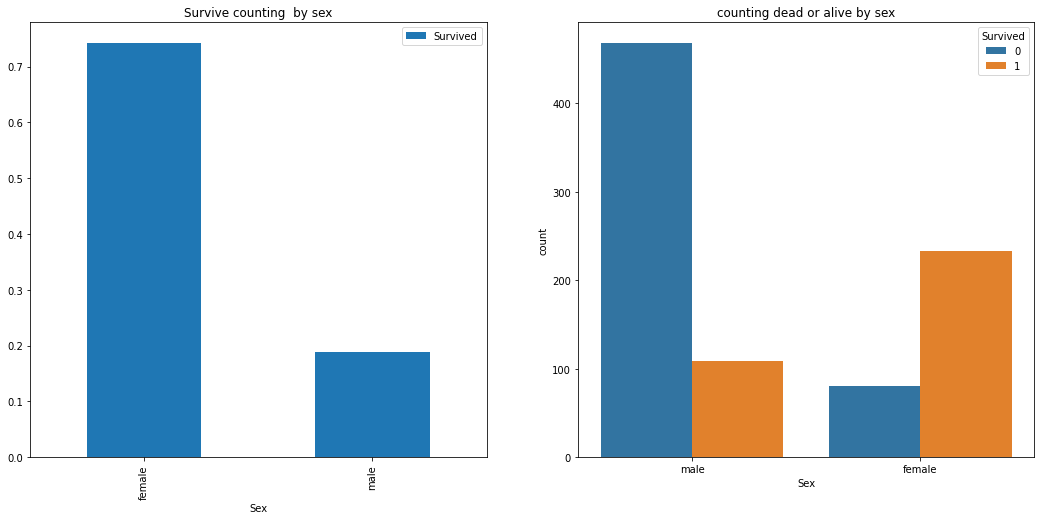

In [47]:
#subplots_'s'넣어야함
f, ax = plt.subplots (1,2, figsize =(18,8))

df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survive counting  by sex')

sns.countplot('Sex',hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('counting dead or alive by sex')

plt.show()



In [48]:
# female was survived more than male


In [49]:
df_train[ ['Sex','Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [50]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [51]:
# pclass, sex affect to predict survive

## 2-3. Embarked

In [52]:
# train['Embarked'].isnull().sum()

In [53]:
# test['Embarked'].isnull().sum()

In [54]:
# train['Embarked'].value_counts()

In [55]:
# test['Embarked'].value_counts()

In [56]:
# train['Embarked'].fillna('S', inplace=True)

In [57]:
# test['Embarked'].isnull().sum()
#만약 존재한다면 위에처럼 train['E'].fillna(~~)

In [58]:
# train['Embarked_Clean']=train['Embarked'].astype('category').cat.codes
# test['Embarked_Clean']=test['Embarked'].astype('category').cat.codes

# train['Embarked_Clean']

In [59]:
## get_dummies

import numpy as np 
import pandas as pd

season = pd.DataFrame({'season':['spring', 'summer', 'fall', 'winter', np.nan]}) 
#마지막 부분은 결측값 처리 예시를 위한 Nan 값을 생성해준다.
pd.get_dummies(season['season'])
pd.get_dummies(season['season'], dummy_na=True)


,fall,spring,summer,winter,NaN
0,0,1,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,0,0,1


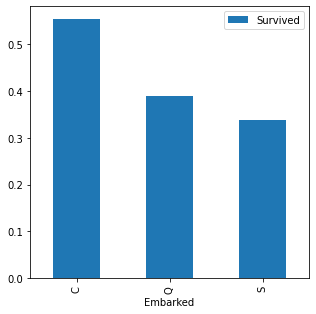

In [60]:
f, ax=plt.subplots(1,1, figsize=(5,5))
df_train[ ['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

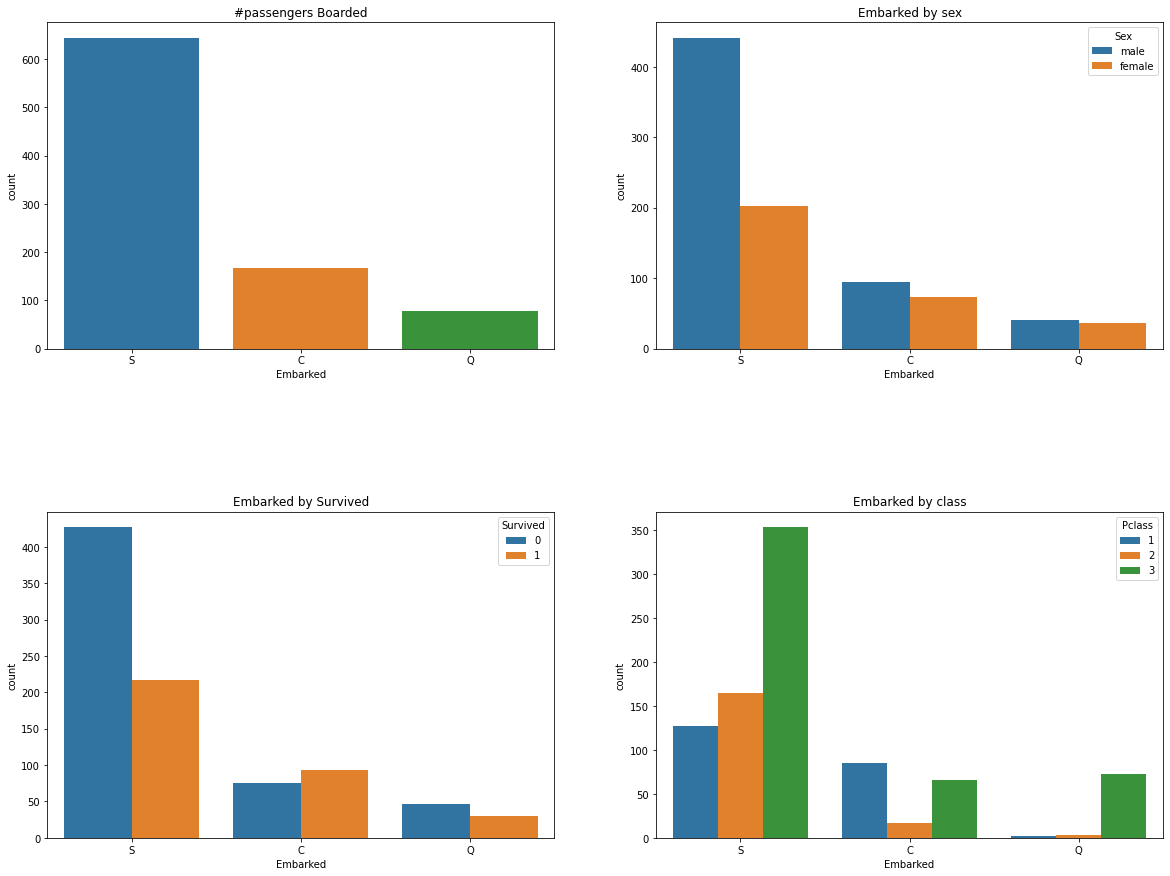

In [61]:
f, ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('#passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('Embarked by sex')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('Embarked by Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('Embarked by class')

#만약 사이에 공간을 두고싶다면
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [62]:
# 1.embarked: s에 가장 많은 사람들이 탔었음
# 2. s에 남성비율이 더 많았음
# 3.s에 가장 많은 비율이 사망
# 4. s는 3등급이 가장 높은 비율, c는 1등급의 승객
# --> 따라서 낮은 등급의 남성승객이많은 s에서 가장 많은 사망을 기록함
# ---> 성별, class가 사망에 영향을 미치는 요인임을 재확인

## 2-4. Family

In [63]:
# train['Family']=train['SibSp']+train['Parch']
# test['Family']=test['SibSp']+test['Parch']

# train['Family']
# #여기서 Family가 0인 경우가 존재함
# #따라서

# train['Family']=1+train['SibSp']+train['Parch']
# test['Family']=1+test['SibSp']+test['Parch']
# train['Family']

In [64]:
# train['Solo']=(train['Family'] == 1)
# test['Solo']=(test['Family'] == 1)

In [65]:
df_train['Family']=df_train['SibSp']+df_train['Parch']+1
df_test['Family']=df_test['SibSp']+df_test['Parch']+1

print('train_maximum family size : ', df_train['Family'].max())
print('train_minimum family size : ', df_train['Family'].min())
print('test_maximum family size : ', df_test['Family'].max())
print('test_minimum family size : ', df_test['Family'].min())

train_maximum family size :  11
train_minimum family size :  1
test_maximum family size :  11
test_minimum family size :  1


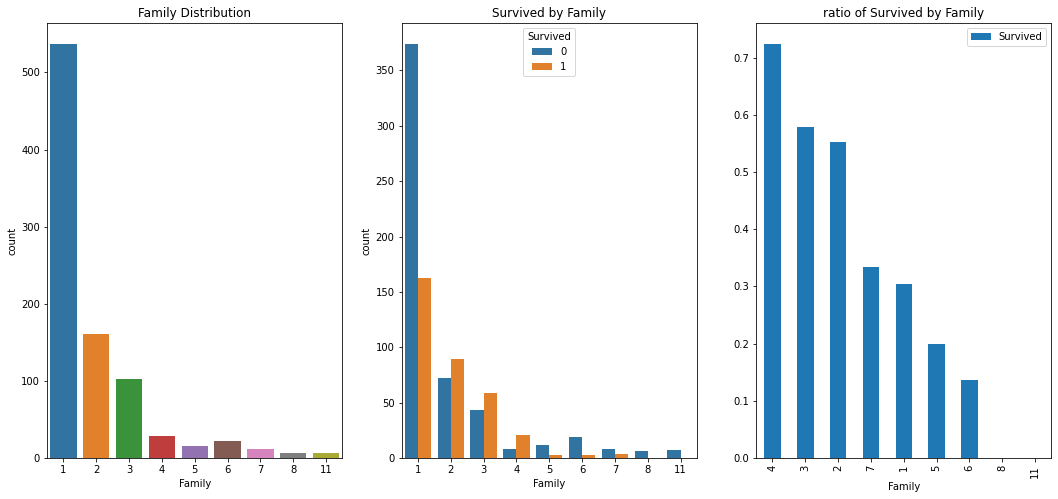

In [66]:
f, ax =plt.subplots(1,3)

sns.countplot('Family', data=df_train, ax=ax[0])
ax[0].set_title('Family Distribution')

sns.countplot('Family',hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('Survived by Family')

df_train[ ['Family','Survived']].groupby(['Family'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('ratio of Survived by Family')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()




In [67]:
# most #of family was single, 2~4 families have most survived ratio, 

## 2-5. Fare(Fee)

In [68]:
# train['FareBin']=pd.qcut(train['Fare'], 5)
# test['FareBin']=pd.qcut(test['Fare'], 5)
# train['FareBin']

In [69]:
# train['FareBin'].value_counts()

In [70]:
# test['FareBin'].value_counts()

In [71]:
# train['FareBin_Clean']=train['FareBin'].astype('category').cat.codes
# test['FareBin_Clean']=test['FareBin'].astype('category').cat.codes
# train['FareBin_Clean']

In [72]:
# train['FareBin_Clean'].value_counts()

In [73]:
# test['FareBin_Clean'].value_counts()

In [74]:
df_train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

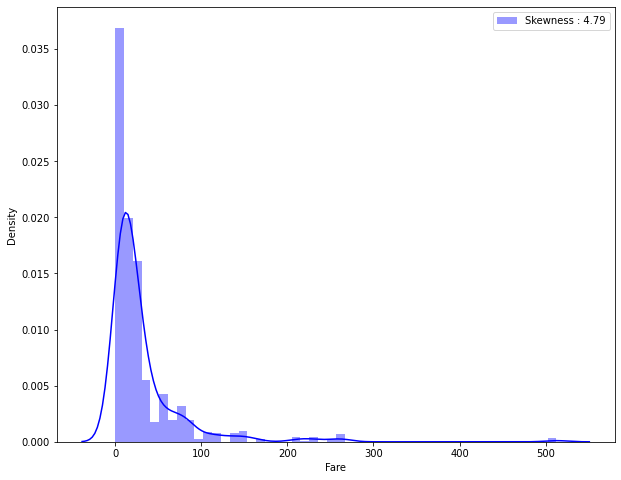

In [75]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
#서순

g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g.legend(loc='best')

In [76]:
# 1.skewness is more than 4, it is negative-skewnessed
#  - so to deal with skewness, we need to scaling this data.
#  - there are several ways to deal with this problem, like log transformation, remove outlier... 
# 2.approximately, most of Fare is in 0 to 30.



In [77]:
print(df_train['Fare'].isnull().sum())
df_test['Fare'].isnull().sum()

0


1

In [78]:
#to use logtransformation, we can use apply, map or lambda x
#there are 1 missing value in df_test

df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()

df_train['Fare']=df_train['Fare'].map(lambda x :np.log(x) if x>0 else 0)
df_test['Fare']=df_test['Fare'].map(lambda x :np.log(x) if x>0 else 0)



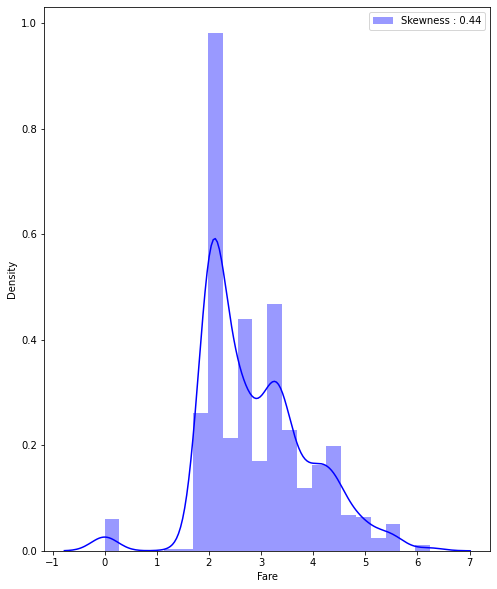

In [79]:
fig, ax = plt.subplots(1,1, figsize=(8,10))

g=sns.distplot(df_train['Fare'],color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)

g=g.legend(loc='Best')

##2-6.Ticket 

In [80]:
# df_train['Ticket'].isnull().sum()

In [81]:
# df_train['Ticket'].value_counts()

In [82]:
# if devide this values as group, we can devide as number or letter
# print(df_train['Ticket'])


# def lettering(x):
#   if df_train['Ticket'].str.contains(r'(^[A-Z])') in x :
#     return 




# print(df_train['Ticket'].str.contains(r'(^[A-Z])').head(30))
# print(df_train['Ticket'])


## 6. title(Name)

09.15_꼬임 여기부터 다시

In [83]:
##loc + boolean + column 

In [84]:
# #.에 해당하는 문장 가져오기
# train['Title']=train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
# test['Title']=test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# train['Title']

In [85]:
# train['Title']= train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

In [86]:
# train['Title'].value_counts()

In [87]:
# test['Title']= test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

In [88]:
# test['Title'].value_counts()

In [89]:
# train['Title_Clean']=train['Title'].astype('category').cat.codes
# test['Title_Clean']=test['Title'].astype('category').cat.codes

# train['Title_Clean']

In [90]:
# train['Title_Clean'].value_counts()

In [91]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [92]:
df_train['Initial']=df_train['Name'].str.extract(r'([A-Za-z]*)\.')
df_train['Initial']

df_test['Initial']=df_test['Name'].str.extract(r'([A-Za-z]*)\.')
df_test['Initial']

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Initial, Length: 418, dtype: object

In [93]:
df_train['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initial, dtype: int64

In [94]:
print(df_train['Initial'].value_counts())

df_test['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initial, dtype: int64


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Initial, dtype: int64

In [95]:
#check relation name and sex

pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r')

#check relation name and sex

# pd.crosstab(df_test['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [96]:
df_train['Initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Rev','Sir'],
                            ['Mr','Mr','Mrs','Mr','Mr','Mr','Mrs','Mr','Mrs','Mrs','Mr','Mr'],inplace=True)

df_test['Initial'].replace(['Col','Dona','Dr','Rev'],['Mr','Mr','Mrs','Mr'],inplace=True)

# df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
#                         ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_train['Initial'].value_counts()

# df_test.loc[(df_test.Initial=='Ms')]

Mr        538
Miss      182
Mrs       130
Master     40
Ms          1
Name: Initial, dtype: int64

In [97]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,408.884615,0.697802,2.307692,21.773973,0.714286,0.549451,3.110257,2.263736
Mr,457.697026,0.161710,2.369888,33.022727,0.289963,0.150558,2.651341,1.440520
Mrs,459.115385,0.800000,1.961538,35.663717,0.676923,0.800000,3.459502,2.476923
Ms,444.000000,1.000000,2.000000,28.000000,0.000000,0.000000,2.564949,1.000000


In [98]:
# Survive ratio of Miss,Mrs,Ms is higher than male(Master,Mr)

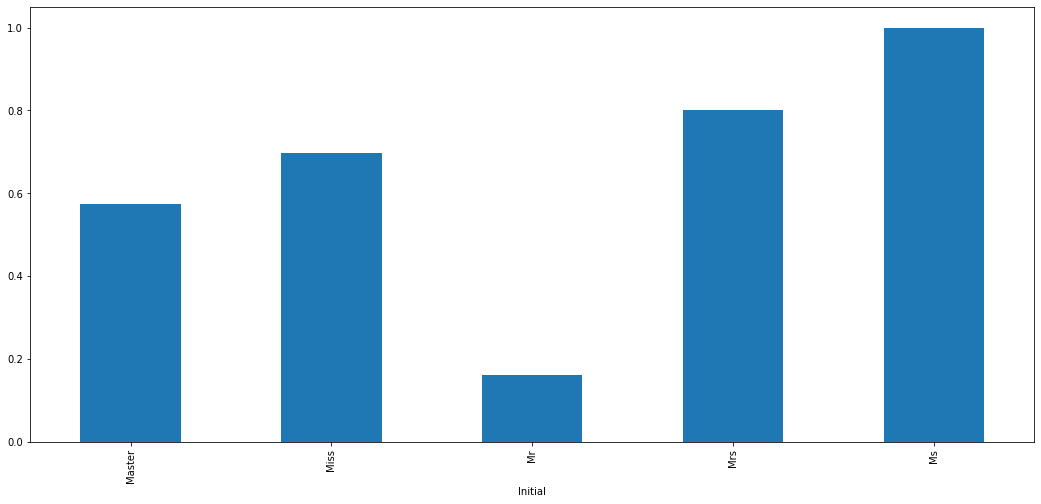

In [99]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

## 2-7. Age

In [100]:
# train['Age'].isnull().sum()

In [101]:
# test['Age'].isnull().sum()

In [102]:
# train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
# test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

# train['Age'].isnull().sum()




In [103]:
# train.loc[ train['Age'] < 10, 'Age_Clean'] = 0
# train.loc[ (train['Age'] >= 10) & (train['Age'] < 15) , 'Age_Clean' ] = 1
# train.loc[ (train['Age'] >= 15) & (train['Age'] < 20) , 'Age_Clean' ] = 2
# train.loc[ (train['Age'] >= 20) & (train['Age'] < 25) , 'Age_Clean' ] = 3
# train.loc[ (train['Age'] >= 25) & (train['Age'] < 30) , 'Age_Clean' ] = 4
# train.loc[ (train['Age'] >= 30) & (train['Age'] < 35) , 'Age_Clean' ] = 5
# train.loc[ (train['Age'] >= 35) & (train['Age'] < 40) , 'Age_Clean' ] = 6
# train.loc[ (train['Age'] >= 40) & (train['Age'] < 45) , 'Age_Clean' ] = 7
# train.loc[ (train['Age'] >= 45) & (train['Age'] < 50) , 'Age_Clean' ] = 8
# train.loc[ (train['Age'] >= 50) & (train['Age'] < 60) , 'Age_Clean' ] = 9
# train.loc[ train['Age'] >= 60, 'Age_Clean'] = 10

# train['Age_Clean']

In [104]:
# test.loc[ test['Age'] < 10, 'Age_Clean'] = 0
# test.loc[ (test['Age'] >= 10) & (test['Age'] < 15) , 'Age_Clean' ] = 1
# test.loc[ (test['Age'] >= 15) & (test['Age'] < 20) , 'Age_Clean' ] = 2
# test.loc[ (test['Age'] >= 20) & (test['Age'] < 25) , 'Age_Clean' ] = 3
# test.loc[ (test['Age'] >= 25) & (test['Age'] < 30) , 'Age_Clean' ] = 4
# test.loc[ (test['Age'] >= 30) & (test['Age'] < 35) , 'Age_Clean' ] = 5
# test.loc[ (test['Age'] >= 35) & (test['Age'] < 40) , 'Age_Clean' ] = 6
# test.loc[ (test['Age'] >= 40) & (test['Age'] < 45) , 'Age_Clean' ] = 7
# test.loc[ (test['Age'] >= 45) & (test['Age'] < 50) , 'Age_Clean' ] = 8
# test.loc[ (test['Age'] >= 50) & (test['Age'] < 60) , 'Age_Clean' ] = 9
# test.loc[ test['Age'] >= 60, 'Age_Clean'] = 10


# test['Age_Clean']

# test['Age'].isnull().sum()

In [105]:
# train['Age_Clean'].isnull().sum()
# train['Age_Clean'].value_counts()

In [106]:
# print(test['Age_Clean'].isnull().sum())
# test['Age_Clean'].value_counts()

In [107]:
##check if there areany missing numbers in age

In [108]:
df_train['Age'].isnull().sum()

177

In [109]:
#we found that there are 177 missing data in it
# so we fill this null data with statistics or some ML algorithm
# in his tutorial, using statistics

In [110]:
df_train.groupby('Initial').mean()
# df_test.groupby('Initial').mean()

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
Initial          0
dtype: int64

In [111]:
df_train['Initial'].value_counts()

Mr        538
Miss      182
Mrs       130
Master     40
Ms          1
Name: Initial, dtype: int64

In [112]:
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Master'),'Age' ] = 5
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Miss'), 'Age' ] =  22
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Mr'), 'Age' ] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Mrs'), 'Age' ] = 36
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Ms'), 'Age' ] = 28

df_train['Age'].isnull().sum()

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'), 'Age' ] = 7
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'), 'Age' ] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'), 'Age' ] = 32
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'), 'Age' ] = 39
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Ms'), 'Age' ] = (22+39)/2

df_test['Age'].isnull().sum()

0

In [113]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
Initial          0
dtype: int64

In [114]:
df_train['Initial'].value_counts()

Mr        538
Miss      182
Mrs       130
Master     40
Ms          1
Name: Initial, dtype: int64

In [115]:
##Fill Null in Embarked

In [116]:
df_train['Embarked'].isnull().sum()

print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null Values')

Embarked has 2 Null Values


In [117]:
##S in embarked has move value in it,so we replace null to S
df_train['Embarked'].fillna('S', inplace=True)



In [118]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family           0
Initial          0
dtype: int64

3-2.Age Categorizing

In [119]:
#there are many options to categorizing
#first, using loc.

df_train['Age_cat']=0

df_train.loc[ df_train['Age'] <10, 'Age_cat']= 0
df_train.loc[ (df_train['Age'] >=10) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[ (df_train['Age'] >=20) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[ (df_train['Age'] >=30) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[ (df_train['Age'] >=40) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[ (df_train['Age'] >=50) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[ (df_train['Age'] >=60) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[ df_train['Age'] >=70, 'Age_cat'] =7

df_test['Age_cat']=0

df_test.loc[ df_test['Age'] <10, 'Age_cat']= 0
df_test.loc[ (df_test['Age'] >=10) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[ (df_test['Age'] >=20) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[ (df_test['Age'] >=30) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[ (df_test['Age'] >=40) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[ (df_test['Age'] >=50) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[ (df_test['Age'] >=60) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[ df_test['Age'] >=70, 'Age_cat'] =7

In [120]:
df_train['Age_cat']

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    2
889    2
890    3
Name: Age_cat, Length: 891, dtype: int64

In [121]:
#second, use func()

def category_age(x) :
  if x<10:
    return 0
  if x<20:
    return 1
  if x<30:
    return 2
  if x<40:
    return 3
  if x<50:
    return 4
  if x<60:
    return 5
  if x<70 :
    return 6
  else :
    return 7

df_train['Age_cat2'] = df_train['Age'].apply(category_age)

df_train['Age_cat2']

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    2
889    2
890    3
Name: Age_cat2, Length: 891, dtype: int64

In [122]:
#check 2 methodare same

print('Those methods are same? : ', (df_train['Age_cat'] == df_train['Age_cat2']).all() )

Those methods are same? :  True


In [123]:
#we use only 1 method that you like. so drop we dont use

df_train.drop(['Age','Age_cat2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1,inplace=True)


In [124]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Initial', 'Age_cat'],
      dtype='object')

In [125]:
df_train['Initial'].value_counts()

Mr        538
Miss      182
Mrs       130
Master     40
Ms          1
Name: Initial, dtype: int64

##3-3 initial, embarked, sex

In [126]:
df_train['Initial'].value_counts()
# or
# df_trian['Initial].unique()

Mr        538
Miss      182
Mrs       130
Master     40
Ms          1
Name: Initial, dtype: int64

In [127]:
df_train['Initial'] = df_train['Initial'].map( {'Master' : 0, 'Miss' : 1, 'Mr' : 2 ,'Mrs' : 3, 'Ms' : 4})
df_test['Initial'] = df_test['Initial'].map( {'Master' : 0, 'Miss' : 1, 'Mr' : 2,'Mrs' : 3, 'Ms' : 4})

In [128]:
df_train['Embarked'] = df_train['Embarked'].map( {'C':0,'Q':1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map( {'C':0,'Q':1,'S':2})

In [129]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [130]:
df_train['Sex']=df_train['Sex'].map( {'female':0, 'male':1})
df_test['Sex']=df_test['Sex'].map( {'female':0, 'male':1})

## 3-4 Correlation

In [131]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Initial', 'Age_cat'],
      dtype='object')

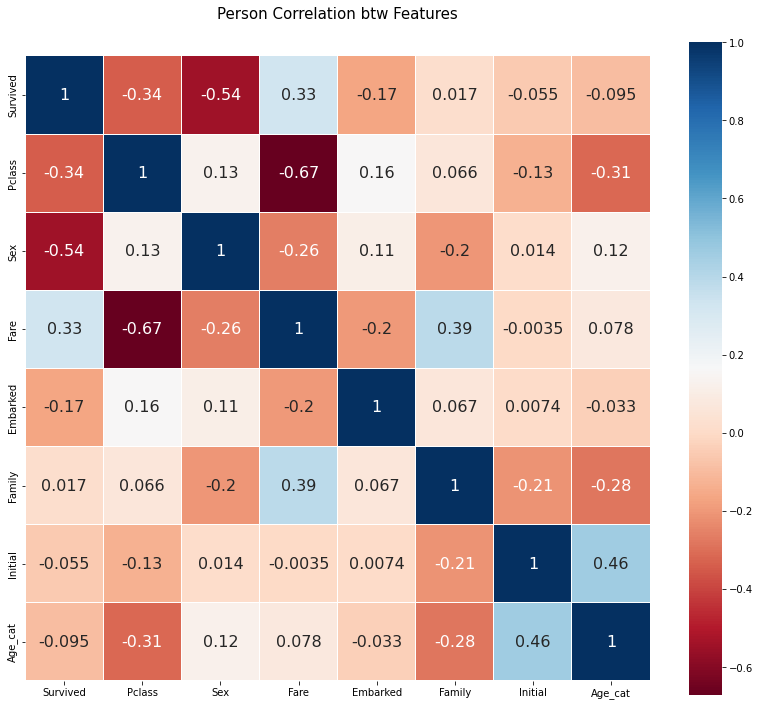

In [132]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','Family','Initial','Age_cat']]


colormap=plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Person Correlation btw Features', y=1.05, size=15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white',annot=True, annot_kws={'size':16})

#맨 아래 데이터제거
del heatmap_data


## one hot coding

In [133]:
df_train=pd.get_dummies(df_train, columns=['Initial'],prefix='Initial')
df_test=pd.get_dummies(df_test, columns=['Initial'],prefix='Initial')

In [134]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [135]:
df_train=pd.get_dummies(df_train, columns=['Embarked'],prefix='Embarked')
df_test=pd.get_dummies(df_test, columns=['Embarked'],prefix='Embarked')

In [136]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Family,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


##3-5. drop tables

In [137]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)

In [138]:
df_train.head()

,Survived,Pclass,Sex,Fare,Family,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [139]:
df_test.head()

,Pclass,Sex,Fare,Family,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


##4.Building model & predicting

in this practice, we use only randomforestclassifier

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [176]:
#make train, validation, test

x_train=df_train.drop('Survived', axis=1).values
target_label=df_train['Survived'].values
x_test=df_test.values

In [177]:
x_train,x_vld,y_train,y_vld = train_test_split(x_train, target_label, test_size=0.3, random_state=2018) 

In [ ]:
# we use default options of randomforestClassifier

##4-2. model generation and prediction btw train,vld

In [178]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
prediction=model.predict(x_vld)

In [179]:
#check performance of model

print('total #{}, {:.2f}% accuracy'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

total #268, 82.09% accuracy


we do nothing but got 82% of accuracy

##4-3. Feature importance

importance means that model we made  affected by which feature.

In [184]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

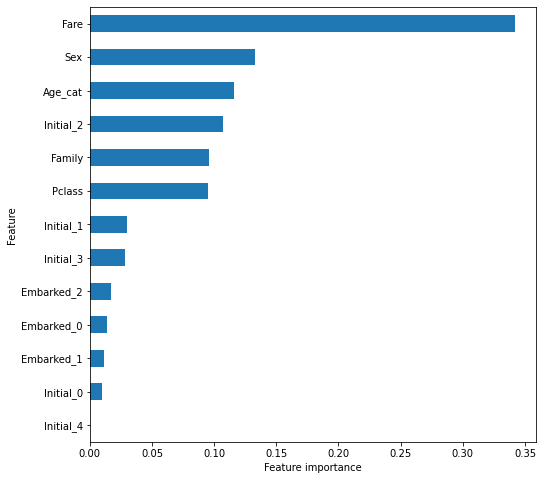

In [186]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()

plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# 1. Fare has significant effect to predict survive of titanic
# 2. sex is second variable to predict survive 

if we use different model, we could get a different result of importance table

##4-4. Prediction on Test set

In [187]:
##this is kaggle link
# submission=pd.read_csv('../input/gender_submission.csv')

##this is my googledrive link
submission=pd.read_csv('/content/drive/MyDrive/주피터_대피소/kaggle&github/1.titanic/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [188]:
prediction=model.predict(x_test)
submission['Survived']=prediction

In [189]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [190]:
submission.to_csv('/content/drive/MyDrive/주피터_대피소/kaggle&github/1.titanic/my_submission.csv', index=False)

## 2-8. Cabin

In [140]:
# df_train['Cabin'].isnull().sum()

In [141]:
#there are many missed values, so it not better in this analysis.

In [142]:
# train['Cabin'].str[:1].value_counts()
# train['Cabin'].isnull().sum()



In [143]:
# mapping = {
#     'A': 0,
#     'B': 1,
#     'C': 2,
#     'D': 3,
#     'E': 4,
#     'F': 5,
#     'G': 6,
#     'T': 7
# }

In [144]:
# train['Cabin_Clean']=train['Cabin'].str[:1]
# train['Cabin_Clean']

In [145]:
# train['Cabin_Clean']=train['Cabin_Clean'].map(mapping)
# train['Cabin_Clean']

In [146]:
# train[ ['Pclass', 'Cabin'] ].head()

In [147]:
# train.groupby( 'Pclass')['Cabin_Clean'].median()

In [148]:
# train['Cabin_Clean'].head(20)

In [149]:
# test['Cabin_Clean']=test['Cabin'].str[:1]
# test['Cabin_Clean']=test['Cabin_Clean'].map(mapping)
# test['Cabin_Clean']

In [150]:
# train['Cabin_Clean']=train.groupby('Pclass')['Cabin_Clean'].transform('median')
# test['Cabin_Clean']=test.groupby('Pclass')['Cabin_Clean'].transform('median')

# train['Cabin_Clean'].head()

In [151]:
# print(train['Cabin_Clean'].value_counts())
# test['Cabin_Clean'].value_counts()

## 9. Feature & Label

In [152]:
# feature=[
#    'Pclass',
#     'SibSp',
#     'Parch',
#     'Sex_Clean',
#     'Embarked_Clean',
#     'Family',
#     'solo',
#     'Title_Clean',
#     'Age_Clean',
#     'Cabin_Clean',
#     'FareBin_Clean'
# ]

In [153]:
# label=[
#     'Survived'
# ]

## 10. modeling

In [154]:
# data=train[feature]
# target=train[label]

# data.shape

# target.shape

In [155]:
# from sklearn.model_selection import train_test_split as tts
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score as cross

In [156]:
# k_fold=KFold(n_splits=10, shuffle=True, random_state=0)

In [157]:
# x_train, x_test, y_train, y_test = tts(data, target, random_state=0)

In [158]:
# from sklearn.ensemble import RandomForestClassifier as RF
# from xgboost import XGBClassifier

In [159]:
# clf = RF(n_estimators=200, max_depth=8, random_state=0)
# cross(clf, data, target, cv=k_fold, scoring='accuracy').mean()

In [160]:
# clf = XGBClassifier(learning_rate=0.025, max_depth=6, n_estimators=500, colsample_bytree=0.8, subsample=0.9)
# cross(clf, data, target, cv=k_fold, scoring='accuracy', ).mean()

## 11. Make Prediction

In [161]:
# x_train=train[feature]
# x_test = test[feature]
# y_train=train[label]

In [162]:
# clf.fit(x_train, y_train)

In [163]:
# pred=clf.predict(x_test)

In [164]:
# gender['Survived'] = pred

In [165]:
# gender.to_csv('titanic-submission-4.csv', index=False)